In [21]:
# Data
import numpy as np
import pandas as pd
import random

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# # styling
%matplotlib inline
# sns.set_style('darkgrid')
# mpl.rcParams['font.size'] = 14
# mpl.rcParams['figure.facecolor'] = '#00000000'
# mpl.rcParams['font.size'] = 14
# mpl.rcParams['figure.facecolor'] = '#00000000'

import os

import warnings
warnings.filterwarnings("ignore")

# Applying Under sampling

In [23]:
df_cr = pd.read_csv("G:\\Loan Data Analysis\\data\\credit_risk_dataset2.csv")
df_cr.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
0,OWN,EDUCATION,B,N,9600,21,5.0,1000,11.14,0,0.10,0
1,MORTGAGE,MEDICAL,C,N,9600,25,1.0,5500,12.87,0,0.44,1
2,RENT,MEDICAL,C,N,65500,23,4.0,23125,15.23,0,0.44,1
3,RENT,MEDICAL,C,Y,54400,24,8.0,23125,14.27,2,0.44,1
4,OWN,VENTURE,A,N,9900,21,2.0,2500,7.14,0,0.25,1


In [24]:
df_cr.duplicated().sum()

36

In [25]:
df_cr.drop_duplicates(inplace = True)

In [26]:
df_cr.isnull().sum()

person_home_ownership         0
loan_intent                   0
loan_grade                    0
cb_person_default_on_file     0
person_income                 0
person_age                    0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
cb_person_cred_hist_length    0
loan_percent_income           0
loan_status                   0
dtype: int64

In [27]:
df_cr.dropna(inplace = True)

In [28]:
df_cr["loan_status"].value_counts()

loan_status
0    24982
1     7004
Name: count, dtype: int64

In [29]:
df_cr_0 = df_cr[df_cr["loan_status"] == 0].sample(12012)

In [30]:
df_cr_1 = df_cr[df_cr["loan_status"] == 1]

In [31]:
df_cr_new = pd.concat([df_cr_0, df_cr_1], axis = 0)

In [32]:
# Shuffle the index of the DataFrame
shuffled_index = df_cr_new.index.to_list()
random.shuffle(shuffled_index)

# Reindex the DataFrame with the shuffled index
df_cr_new = df_cr_new.reindex(shuffled_index)

In [33]:
df_cr_new["loan_status"].value_counts(1)

loan_status
0    0.631679
1    0.368321
Name: proportion, dtype: float64

In [34]:
X = df_cr_new.drop(columns= ['loan_status'])
y = df_cr_new['loan_status']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=12, stratify = y )
print(f"Shape of X train {X_train.shape}, X test {X_test.shape}")
print(f"Shape of Y train {y_train.shape}, Y test {y_test.shape}")

Shape of X train (14262, 11), X test (4754, 11)
Shape of Y train (14262,), Y test (4754,)


In [36]:
scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length']
ohe_colums = ['loan_grade', 'person_home_ownership','loan_intent']

In [23]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Fit and transform using a DataFrame
temp_X_train = pd.DataFrame(ohe.fit_transform(X_train[ohe_colums]), columns=ohe.get_feature_names_out(ohe_colums), index=X_train.index)
temp_X_test = pd.DataFrame(ohe.transform(X_test[ohe_colums]), columns=ohe.get_feature_names_out(ohe_colums), index=X_test.index)

# Concatenate the one-hot encoded features back to the original DataFrames
X_train = pd.concat([X_train, temp_X_train], axis=1)
X_test = pd.concat([X_test, temp_X_test], axis=1)

In [24]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
import pandas as pd

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length']


std = StandardScaler()

X_train_scaled = pd.DataFrame(std.fit_transform(X_train[scale_cols]),columns=scale_cols, index = X_train.index)
X_test_scaled = pd.DataFrame(std.fit_transform(X_test[scale_cols]),columns=scale_cols, index = X_test.index)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression(max_iter=1000, random_state=12)

lrg.fit(X_train_scaled, y_train)
y_pred_lrg = lrg.predict(X_test_scaled)

print(f"Accuracy on train data {lrg.score(X_train_scaled, y_train)}")
print(f"Accuracy on test data {lrg.score(X_test_scaled, y_test)}")

print(classification_report(y_test, y_pred_lrg))

Accuracy on train data 0.765380374862183
Accuracy on test data 0.7788313120176406
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      3003
           1       0.70      0.59      0.64      1532

    accuracy                           0.78      4535
   macro avg       0.76      0.73      0.74      4535
weighted avg       0.77      0.78      0.77      4535



In [36]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight='balanced', criterion='gini',  max_depth=20, max_features= 'sqrt', random_state=14)
dtc.fit(X_train_scaled, y_train)

y_pred_dtc = dtc.predict(X_test_scaled)
print(f" Accuracy on train data: {dtc.score(X_train_scaled, y_train)}")
print(f" Accuracy on test data: {dtc.score(X_test_scaled, y_test)}")
print(classification_report(y_test, y_pred_dtc))

 Accuracy on train data: 0.980374862183021
 Accuracy on test data: 0.7488423373759647
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3003
           1       0.62      0.65      0.64      1532

    accuracy                           0.75      4535
   macro avg       0.72      0.72      0.72      4535
weighted avg       0.75      0.75      0.75      4535



In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc_main = RandomForestClassifier(random_state=1008)
rfc_main.fit(X_train_scaled, y_train)
y_pred_rfc_main = rfc_main.predict(X_test_scaled)
print(f" Accuracy on train data: {rfc_main.score(X_train_scaled, y_train)}")
print(f" Accuracy on test data: {rfc_main.score(X_test_scaled, y_test)}")
print(classification_report(y_test, y_pred_rfc_main))

 Accuracy on train data: 0.9998529952223447
 Accuracy on test data: 0.8167585446527013
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      3003
           1       0.75      0.69      0.72      1532

    accuracy                           0.82      4535
   macro avg       0.80      0.79      0.79      4535
weighted avg       0.81      0.82      0.81      4535



In [35]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 20)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print(f" Accuracy on train data: {xgb.score(X_train_scaled, y_train)}")
print(f'Accuracy on test_data = {xgb.score(X_test_scaled, y_test)}')
print(classification_report(y_test, y_pred_xgb))

 Accuracy on train data: 0.9100330760749724
Accuracy on test_data = 0.809922822491731
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3003
           1       0.73      0.70      0.71      1532

    accuracy                           0.81      4535
   macro avg       0.79      0.78      0.79      4535
weighted avg       0.81      0.81      0.81      4535



Above models are best of there models taken from previous file. it seems like that undersampling do nnot working good on every model is not a good approach. Oversampling preform better than this so taking over sampling for futher work

# Starting New work

## Reading Data

In [41]:
df_cr = pd.read_csv("credit_risk_dataset_1.csv")
df_cr.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
0,OWN,EDUCATION,B,N,9600,21,5.0,1000,11.14,0,0.10,0
1,MORTGAGE,MEDICAL,C,N,9600,25,1.0,5500,12.87,0,0.57,1
2,RENT,MEDICAL,C,N,65500,23,4.0,35000,15.23,0,0.53,1
3,RENT,MEDICAL,C,Y,54400,24,8.0,35000,14.27,4,0.55,1
4,OWN,VENTURE,A,N,9900,21,2.0,2500,7.14,0,0.25,1


In [42]:
df_cr.isnull().sum()

person_home_ownership         0
loan_intent                   0
loan_grade                    0
cb_person_default_on_file     0
person_income                 0
person_age                    0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
cb_person_cred_hist_length    0
loan_percent_income           0
loan_status                   0
dtype: int64

In [43]:
df_cr.duplicated().sum()

0

In [44]:
df_cr["loan_status"].value_counts()

0    25003
1     7019
Name: loan_status, dtype: int64

## Preprocessing and Splitting

In [45]:
X = df_cr.drop(columns= ['loan_status'])
y = df_cr['loan_status']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=12, stratify = y )
print(f"Shape of X train {X_train.shape}, X test {X_test.shape}")
print(f"Shape of Y train {y_train.shape}, Y test {y_test.shape}")

Shape of X train (24016, 11), X test (8006, 11)
Shape of Y train (24016,), Y test (8006,)


In [47]:
from sklearn.preprocessing import OneHotEncoder
ohe_colums = ['loan_grade', 'person_home_ownership','loan_intent']

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Fit and transform using a DataFrame
temp_X_train = pd.DataFrame(ohe.fit_transform(X_train[ohe_colums]), columns=ohe.get_feature_names_out(ohe_colums), index=X_train.index)
temp_X_test = pd.DataFrame(ohe.transform(X_test[ohe_colums]), columns=ohe.get_feature_names_out(ohe_colums), index=X_test.index)

# Concatenate the one-hot encoded features back to the original DataFrames
X_train = pd.concat([X_train, temp_X_train], axis=1)
X_test = pd.concat([X_test, temp_X_test], axis=1)

In [48]:
from sklearn.preprocessing import OrdinalEncoder

ore = OrdinalEncoder()

X_train["cb_person_default_on_file"] = ore.fit_transform(X_train[["cb_person_default_on_file"]])
X_test["cb_person_default_on_file"] = ore.transform(X_test[["cb_person_default_on_file"]])

In [49]:
X_train.drop(columns= ['loan_grade', 'person_home_ownership','loan_intent'], inplace=True)
X_test.drop(columns= ['loan_grade', 'person_home_ownership','loan_intent'], inplace=True)

In [50]:
X_test

,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_grade_A,loan_grade_B,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
30713,0.0,80000,37,18.0,20000,11.830000,0,0.25,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9135,0.0,66000,25,1.0,5050,11.490000,0,0.08,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11131,1.0,72000,25,3.0,16000,17.140000,3,0.22,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
729,0.0,21600,26,5.0,5200,12.420000,0,0.24,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21862,0.0,53000,34,7.0,3100,7.900000,0,0.06,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15565,0.0,19800,21,4.0,6800,14.590000,0,0.34,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21414,0.0,50004,34,6.0,6000,7.880000,0,0.12,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
23443,0.0,40000,29,7.0,9500,11.034793,0,0.24,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
31661,0.0,45840,41,5.0,4600,10.990000,0,0.10,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [55]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy={1: 9700}, random_state=3)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [56]:
y_train_resampled.value_counts(1)

0    0.659075
1    0.340925
Name: loan_status, dtype: float64

In [57]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_scaled= pd.DataFrame(std.fit_transform(X_train_resampled), columns=X_train_resampled.columns, index= X_train_resampled.index)
X_test_scaled= pd.DataFrame(std.transform(X_test), columns=X_test.columns, index= X_test.index)

In [58]:
# Importing classification report and confussion matrix

from sklearn.metrics import classification_report, confusion_matrix

In [59]:
def confusion(y_test, y_pred):
    sns.set_theme(style= "whitegrid")
    plt.rcParams["figure.figsize"] = [5,3]
    plt.rcParams["figure.autolayout"] = True
    data = confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(data)
    df_cm.index.name = "Actual"
    df_cm.columns.name = "Predicted"
    cm = sns.heatmap(df_cm,annot=True, fmt="g")
    cm.plot()

 Accuracy on train data: 0.9999297061717981
 Accuracy on test data: 0.9344241818636023
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6251
           1       0.97      0.72      0.83      1755

    accuracy                           0.93      8006
   macro avg       0.95      0.86      0.89      8006
weighted avg       0.94      0.93      0.93      8006



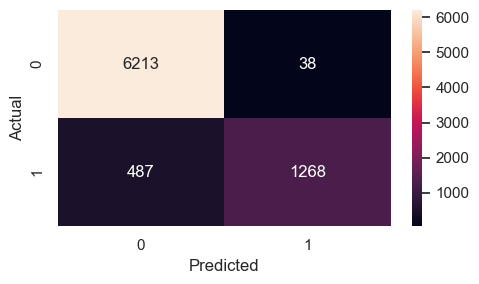

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rfc_main = RandomForestClassifier(random_state=18)
rfc_main.fit(X_train_scaled, y_train_resampled)
y_pred_rfc_main = rfc_main.predict(X_test_scaled)
print(f" Accuracy on train data: {rfc_main.score(X_train_scaled, y_train_resampled)}")
print(f" Accuracy on test data: {rfc_main.score(X_test_scaled, y_test)}")
print(classification_report(y_test, y_pred_rfc_main))
confusion(y_test, y_pred_rfc_main)

## Working on XG Boost (because it gives good results in previous file)

 Accuracy on train data: 0.9490206918338335
Accuracy on test_data = 0.9375526241930957
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5579
           1       0.97      0.74      0.84      1547

    accuracy                           0.94      7126
   macro avg       0.95      0.86      0.90      7126
weighted avg       0.94      0.94      0.93      7126



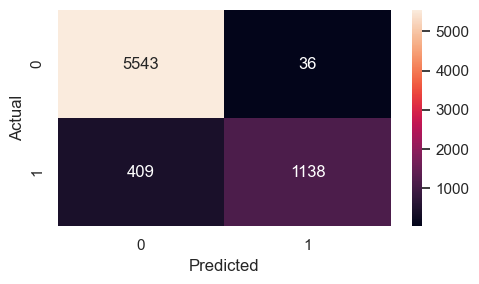

In [23]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 20, n_estimators=400, max_depth=5, learning_rate = 0.05)
xgb.fit(X_train_scaled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test_scaled)

print(f" Accuracy on train data: {xgb.score(X_train_scaled, y_train_resampled)}")
print(f'Accuracy on test_data = {xgb.score(X_test_scaled, y_test)}')
print(classification_report(y_test, y_pred_xgb))
confusion(y_test, y_pred_xgb)

 Accuracy on train data: 0.9998025588374664
Accuracy on test_data = 0.9374122930115072
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5579
           1       0.94      0.76      0.84      1547

    accuracy                           0.94      7126
   macro avg       0.94      0.87      0.90      7126
weighted avg       0.94      0.94      0.93      7126



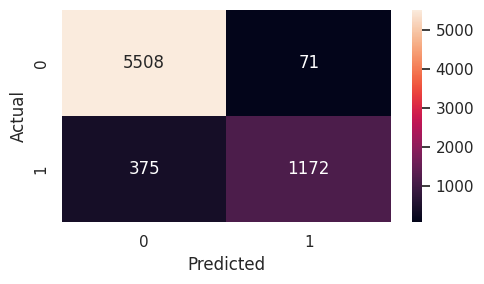

In [21]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test_scaled)

print(f" Accuracy on train data: {xgb.score(X_train_scaled, y_train_resampled)}")
print(f'Accuracy on test_data = {xgb.score(X_test_scaled, y_test)}')
print(classification_report(y_test, y_pred_xgb))
confusion(y_test, y_pred_xgb)

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = {
        "max_depth": [3, 18, 1],
        'gamma': [1,9],
        'reg_alpha' : [40,180,1],
        'reg_lambda' : [0,1],
        'colsample_bytree' : [0.5,1],
        'min_child_weight' : [0, 10, 1],
        'n_estimators': [180, 100, 200],
        'seed': [0]
}

# Create XGBoost model
xgb_model = xgb.XGBClassifier(tree_method='hist')

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='f1', cv=3, n_jobs=-1, verbose=2)

In [49]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = {
    'n_estimators': [100, 200, 500],
    "max_depth": [3, 18, 1],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'colsample_bytree' : [0.5,1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

# Create XGBoost model
xgb_model = xgb.XGBClassifier(tree_method='hist')

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='f1', cv=3, n_jobs=-1, verbose=2)

In [ ]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters found:", grid_search.best_params_)

In [48]:
grid_search.best_params_

{'base_score': 0.2,
 'booster': 'gbtree',
 'gamma': 0,
 'learning_rate': 0.1,
 'n_estimators': 500,
 'reg_alpha': 1,
 'reg_lambda': 5}

 Accuracy on train data: 0.9998815353024798
Accuracy on test_data = 0.9368509682851529
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5579
           1       0.95      0.75      0.84      1547

    accuracy                           0.94      7126
   macro avg       0.94      0.87      0.90      7126
weighted avg       0.94      0.94      0.93      7126



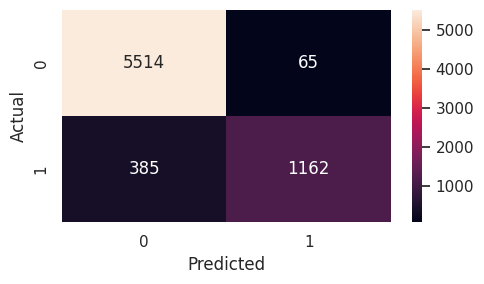

In [51]:
from xgboost import XGBClassifier

xgb_hyp = XGBClassifier(base_score = 0.2, booster = "gbtree", random_state = 15,colsample_bytree =  0.5, n_estimators=500, gamma = 0, min_child_weight = 1, reg_alpha = 1, reg_lambda = 5, max_depth=18, learning_rate = 0.1)
xgb_hyp.fit(X_train_scaled, y_train_resampled)
y_pred_xgb = xgb_hyp.predict(X_test_scaled)

print(f" Accuracy on train data: {xgb_hyp.score(X_train_scaled, y_train_resampled)}")
print(f'Accuracy on test_data = {xgb_hyp.score(X_test_scaled, y_test)}')
print(classification_report(y_test, y_pred_xgb))
confusion(y_test, y_pred_xgb)

 Accuracy on train data: 0.959682514610646
Accuracy on test_data = 0.9403592478248667
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5579
           1       0.98      0.74      0.84      1547

    accuracy                           0.94      7126
   macro avg       0.96      0.87      0.90      7126
weighted avg       0.94      0.94      0.94      7126



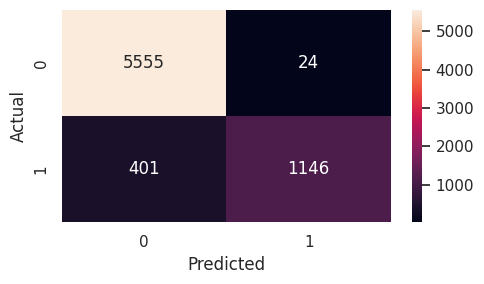

In [43]:
from xgboost import XGBClassifier

xgb_hyp = XGBClassifier(random_state = 15,colsample_bytree =  0.5, n_estimators=500, gamma = 1, min_child_weight = 1, reg_alpha = 1, reg_lambda = 1, max_depth=18, learning_rate = 0.1)
xgb_hyp.fit(X_train_scaled, y_train_resampled)
y_pred_xgb = xgb_hyp.predict(X_test_scaled)

print(f" Accuracy on train data: {xgb_hyp.score(X_train_scaled, y_train_resampled)}")
print(f'Accuracy on test_data = {xgb_hyp.score(X_test_scaled, y_test)}')
print(classification_report(y_test, y_pred_xgb))
confusion(y_test, y_pred_xgb)

- All variations of the XGBoost model show promising results.
- Some models exhibit signs of overfitting on the training data, while others demonstrate good accuracy, precision, and recall.
- However, the last model stands out with superior performance, boasting excellent accuracy, precision, recall, and a more favorable confusion matrix compared to the others.
- XGBoost with hyperparameter tuning achieved impressive results with high accuracy on both train (99.99%) and test data (93.69%). It demonstrated strong precision, recall, and 1-score for both classes, indicating robust performance in classification.
- Therefore, this final XGBoost model will be selected as the preferred model for creating the pipeline and making predictions.

## Pipeline

In [14]:
from sklearn.compose import ColumnTransformer
import pickle
import joblib
from sklearn.preprocessing import OneHotEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [15]:
ct_encoding = ColumnTransformer(transformers= [
    ("ohe_enc", OneHotEncoder(sparse_output=False, handle_unknown= "ignore"), [0,1,2]),
    ("ord_enc", OrdinalEncoder(), [3]),
],remainder= "passthrough")

In [17]:
# Defining model
from xgboost import XGBClassifier


model = XGBClassifier(random_state = 15,colsample_bytree =  0.5, n_estimators=500, gamma = 1, min_child_weight = 1, reg_alpha = 1, reg_lambda = 1, max_depth=18, learning_rate = 0.1)

In [18]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[
    ("encoding", ct_encoding),
    ("scaler", StandardScaler()),
    ("model", model)
])

In [37]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 2]),
                                                 ('ord_enc', OrdinalEncoder(),
                                                  [3])])),
                ('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_b...
                               feature_types=None, gamma=1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=18, max_leaves=None,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=500, n_jobs=None,
                               num_parallel_tree=None, random_state=15, ...))])

In [38]:
y_pred_log = pipe.predict(X_test)

In [39]:
pd.Series(y_pred_log).value_counts()

0    3327
1    1427
Name: count, dtype: int64

In [41]:
X_test.index

Index([29396, 11693, 17059,   120, 27445, 17719, 15885, 10234,  7970,  2028,
       ...
        4980, 20531, 13033,  4520,  6908, 27137, 29027,  1538,  7093, 18657],
      dtype='int64', length=4754)

In [42]:
X_test.loc[4980]

person_home_ownership             OWN
loan_intent                   VENTURE
loan_grade                          B
cb_person_default_on_file           N
person_income                   43000
person_age                         22
person_emp_length                 5.0
loan_amnt                        3500
loan_int_rate                   11.49
cb_person_cred_hist_length          0
loan_percent_income              0.08
Name: 4980, dtype: object

In [43]:
y_test.loc[4980]

0

In [44]:
df_cr.sample(5)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
18366,MORTGAGE,PERSONAL,D,N,25000,27,4.0,4750,14.83,0,0.19,0
17659,MORTGAGE,VENTURE,B,N,140835,28,12.0,21000,11.99,0,0.10,0
13256,RENT,MEDICAL,D,Y,44000,22,0.0,12250,15.99,2,0.28,1
26611,MORTGAGE,DEBTCONSOLIDATION,A,N,120000,32,3.0,8000,8.90,0,0.07,0
25552,MORTGAGE,MEDICAL,D,Y,67150,32,4.0,13000,16.00,2,0.16,1


In [45]:
temp_df = pd.DataFrame(data = [["RENT",	"VENTURE",	"D", "Y", 13200, 24, 6.0, 4000, 15.65, 3, 0.3]], columns = X_test.columns)

In [46]:
pipe.predict(temp_df)

array([1])

In [47]:
# Count unique values
unique_values, counts = np.unique(y_pred_log, return_counts=True)

# Display unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0: 3327
1: 1427


In [48]:
joblib.dump(pipe, "best_pipeline_1.pkl")

['best_pipeline_1.pkl']

In [49]:
rfc_model = joblib.load("best_pipeline_1.pkl")

In [50]:
rfc_model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [51]:
rfc_model.predict(temp_df)

array([1])